**Apple:**          2,737<br>
**Asparagus:**      2,159<br>
**Banana:**         2,501<br>
**Broccoli:**       1,996<br>
**Cabbage:**       2,194<br>
**Capsicums:**      1,980<br>
**Cherry:**         2,414<br>
**Cherry Tomato:**  2,553<br>
**Chilli:**         2,488<br>
**Grapes:**         3,525<br>
**Mango:**         2,752<br>
**Pakchoi:**        2,689<br>
**Soursop:**        2,146<br>
**Spinach:**        2,055<br>
**Strawberry:**     2,845<br>

**Total:** 37,034

In [2]:
# Importing the Keras libraries and packages
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Importing other necessary libraries
from sklearn.metrics import classification_report,confusion_matrix
from PIL import Image
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
import h5py, os, itertools, heapq

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\Luther\Anaconda2\envs\Python 3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Section 1: Keras Architecture

In [2]:
# Declaring shape of input images and number of categories to classify
input_shape = (128, 128, 3)
num_classes = 15

model = Sequential()

#convolution layer 1, 2
model.add(Convolution2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#convolution layer 3, 4
model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#convolution layer 5, 6
model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [3]:
# Viewing model_configuration
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
__________

### Section 2: Training the model

Keras has provided a very useful ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This allows images to be augmented real time on the fly before being pass into the CNN, which has an effect of artificially increasing your dataset.

Each specification defined this class can potentially increase your dataset by 100%, which is especially useful when your dataset is small.

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 40,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./Cloud/Train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./Cloud/Validate',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28505 images belonging to 15 classes.
Found 7028 images belonging to 15 classes.


The use of callbacks in keras allows you to monitor a metric and save the weights of model while training is in progress.

In [7]:
# Setting callbacks parameters
checkpointer = ModelCheckpoint(filepath='model_complex.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)
filename='model_train_new.csv'
csv_log = CSVLogger(filename, separator=',', append=False)

In [ ]:
# Training the model
hist = model.fit_generator(training_set,
                           steps_per_epoch = (28153//32),
                           epochs = 200,
                           validation_data = test_set,
                           validation_steps = (7023//32), 
                           workers = 4, 
                           callbacks = [csv_log, checkpointer])

Epoch 1/200
879/879 [==============================] - 151s 171ms/step - loss: 1.9898 - acc: 0.3760 - val_loss: 1.7158 - val_acc: 0.4716

Epoch 00001: val_loss improved from inf to 1.71578, saving model to model_complex.01-1.72.hdf5
Epoch 2/200
879/879 [==============================] - 142s 162ms/step - loss: 1.3578 - acc: 0.5459 - val_loss: 1.3757 - val_acc: 0.5569

Epoch 00002: val_loss improved from 1.71578 to 1.37575, saving model to model_complex.02-1.38.hdf5
Epoch 3/200
879/879 [==============================] - 143s 162ms/step - loss: 1.1646 - acc: 0.6100 - val_loss: 1.6973 - val_acc: 0.4906

Epoch 00003: val_loss did not improve from 1.37575
Epoch 4/200
879/879 [==============================] - 142s 162ms/step - loss: 1.0389 - acc: 0.6574 - val_loss: 3.3369 - val_acc: 0.4177

Epoch 00004: val_loss did not improve from 1.37575
Epoch 5/200
879/879 [==============================] - 143s 162ms/step - loss: 0.9170 - acc: 0.6956 - val_loss: 1.3801 - val_acc: 0.5929

Epoch 00005: v

879/879 [==============================] - 143s 162ms/step - loss: 0.1696 - acc: 0.9424 - val_loss: 0.4133 - val_acc: 0.8948

Epoch 00083: val_loss did not improve from 0.32963
Epoch 84/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1725 - acc: 0.9428 - val_loss: 0.3603 - val_acc: 0.9014

Epoch 00084: val_loss did not improve from 0.32963
Epoch 85/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1716 - acc: 0.9434 - val_loss: 0.4153 - val_acc: 0.8850

Epoch 00085: val_loss did not improve from 0.32963
Epoch 86/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1724 - acc: 0.9423 - val_loss: 0.3427 - val_acc: 0.9107

Epoch 00086: val_loss did not improve from 0.32963
Epoch 87/200
879/879 [==============================] - 142s 162ms/step - loss: 0.1650 - acc: 0.9446 - val_loss: 0.3997 - val_acc: 0.8923

Epoch 00087: val_loss did not improve from 0.32963
Epoch 88/200
879/879 [==============================] - 143s 16


Epoch 00125: val_loss did not improve from 0.30005
Epoch 126/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1361 - acc: 0.9560 - val_loss: 0.4445 - val_acc: 0.8964

Epoch 00126: val_loss did not improve from 0.30005
Epoch 127/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1357 - acc: 0.9548 - val_loss: 0.4043 - val_acc: 0.8983

Epoch 00127: val_loss did not improve from 0.30005
Epoch 128/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1363 - acc: 0.9541 - val_loss: 0.3024 - val_acc: 0.9271

Epoch 00128: val_loss did not improve from 0.30005
Epoch 129/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1352 - acc: 0.9538 - val_loss: 0.4227 - val_acc: 0.9038

Epoch 00129: val_loss did not improve from 0.30005
Epoch 130/200
879/879 [==============================] - 143s 162ms/step - loss: 0.1314 - acc: 0.9564 - val_loss: 0.3500 - val_acc: 0.9128

Epoch 00130: val_loss did not improve from 0

We plot the loss and accuracy curves below to visualise the movement of training and validation sets. A diverging trend between training and validation sets will signal overfitting.

Text(0.5,1,'Training & Validation Accuracy')

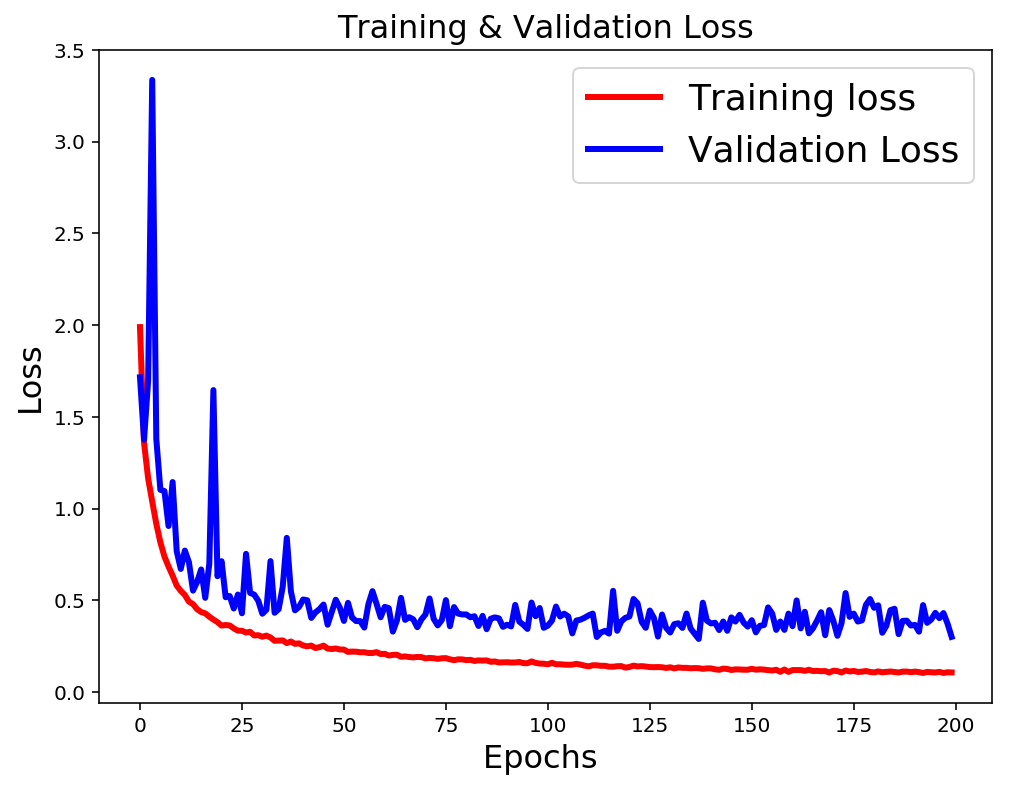

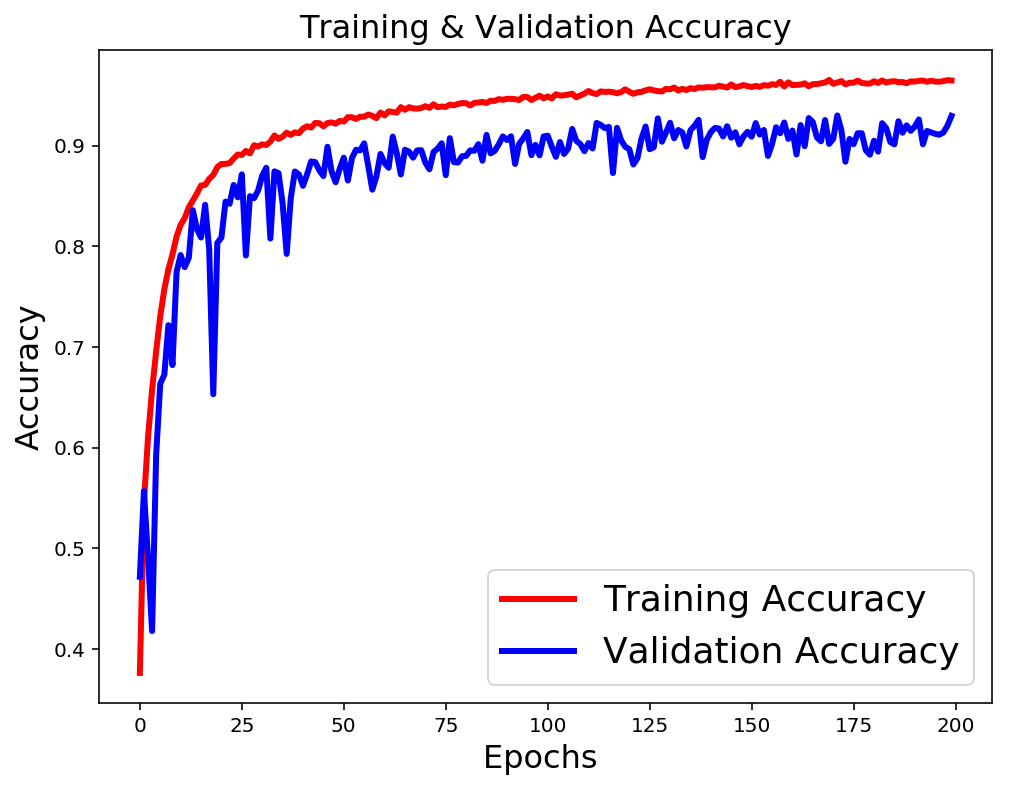

In [9]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Training & Validation Loss',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Training & Validation Accuracy',fontsize=16)

### Section 3: Model Evaluation

In [3]:
# We load model 95 from our keras model which has the best weights

from keras.models import load_model

loaded_model = load_model('./Results/model_complex.95-0.23.hdf5')

We then prepare our test images for prediction later. As a machine does not comprehend images like humans do, there is a need to convert them in terms of numbers before any operation can be done.

In [4]:
# loading all test images as array and append to list
num_classes = 15
test_dir = './Model/Test/'

test_list=[]

for category in os.listdir(test_dir):
    image_list =os.listdir(test_dir + category)
    print ('Loaded images of dataset-'+'{}'.format(category))
    for img in image_list:
        test_image = load_img(test_dir + category + '/' + img, target_size = (128, 128))
        test_image = img_to_array(test_image)/255
        test_image = np.expand_dims(test_image, axis = 0)
        test_list.append(test_image)

test_data = np.array(test_list)
test_data = test_data.astype('float32')
print (test_data.shape)

Loaded images of dataset-apple
Loaded images of dataset-asparagus
Loaded images of dataset-banana
Loaded images of dataset-broccoli
Loaded images of dataset-cabbage
Loaded images of dataset-capsicums
Loaded images of dataset-cherry
Loaded images of dataset-cherry_tomato
Loaded images of dataset-chilli
Loaded images of dataset-grapes
Loaded images of dataset-mango
Loaded images of dataset-pakchoi
Loaded images of dataset-soursop
Loaded images of dataset-spinach
Loaded images of dataset-strawberry
(1500, 1, 128, 128, 3)


In [5]:
# Creating 2 list
# List 1 - number of images in each category
# List 2 - cumulative number of images

img_count_incat = []
img_count_incat_cumulative = []
for category in os.listdir(test_dir):
    path, dirs, files = next(os.walk(test_dir + category))
    img_count = len(files)
    img_count_incat.append(img_count)
    img_count_incat_cumulative.append(np.sum(img_count_incat))

In [6]:
# convert class labels to on-hot encoding

num_of_samples = test_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

for i in range(num_classes):
    if i == 0:
        labels[0:img_count_incat_cumulative[i]] = i
    else:
        labels[img_count_incat_cumulative[i-1]:img_count_incat_cumulative[i]] = i

target_names = ['Apple', 'Asparagus', 'Banana', 'Broccoli', 'Cabbage', 
                'Capsicums', 'Cherry', 'Cherry Tomato', 'Chilli', 'Grapes', 
                'Mango', 'Pakchoi', 'Soursop', 'Spinach', 'Strawberry']

Y = np_utils.to_categorical(labels, num_classes)

In [7]:
# function to predict the classification of an image and append results to a list

def predictor(test_data, model):
    predictions = []
    for i in range(len(test_data)):
        result = model.predict_classes(test_data[i])
        predictions.append(int(result))
    
    return predictions

In [8]:
# Function for plotting the confusion matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    Function plots a confusion matrix

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=65, fontsize=12)
        plt.yticks(tick_marks, target_names, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label\n\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass), fontsize=15)
    plt.show()

In [9]:
# Obtaining true labels and corresponding predictions
true_labels = np.argmax(Y, axis = 1)
predictions = predictor(test_data, loaded_model)

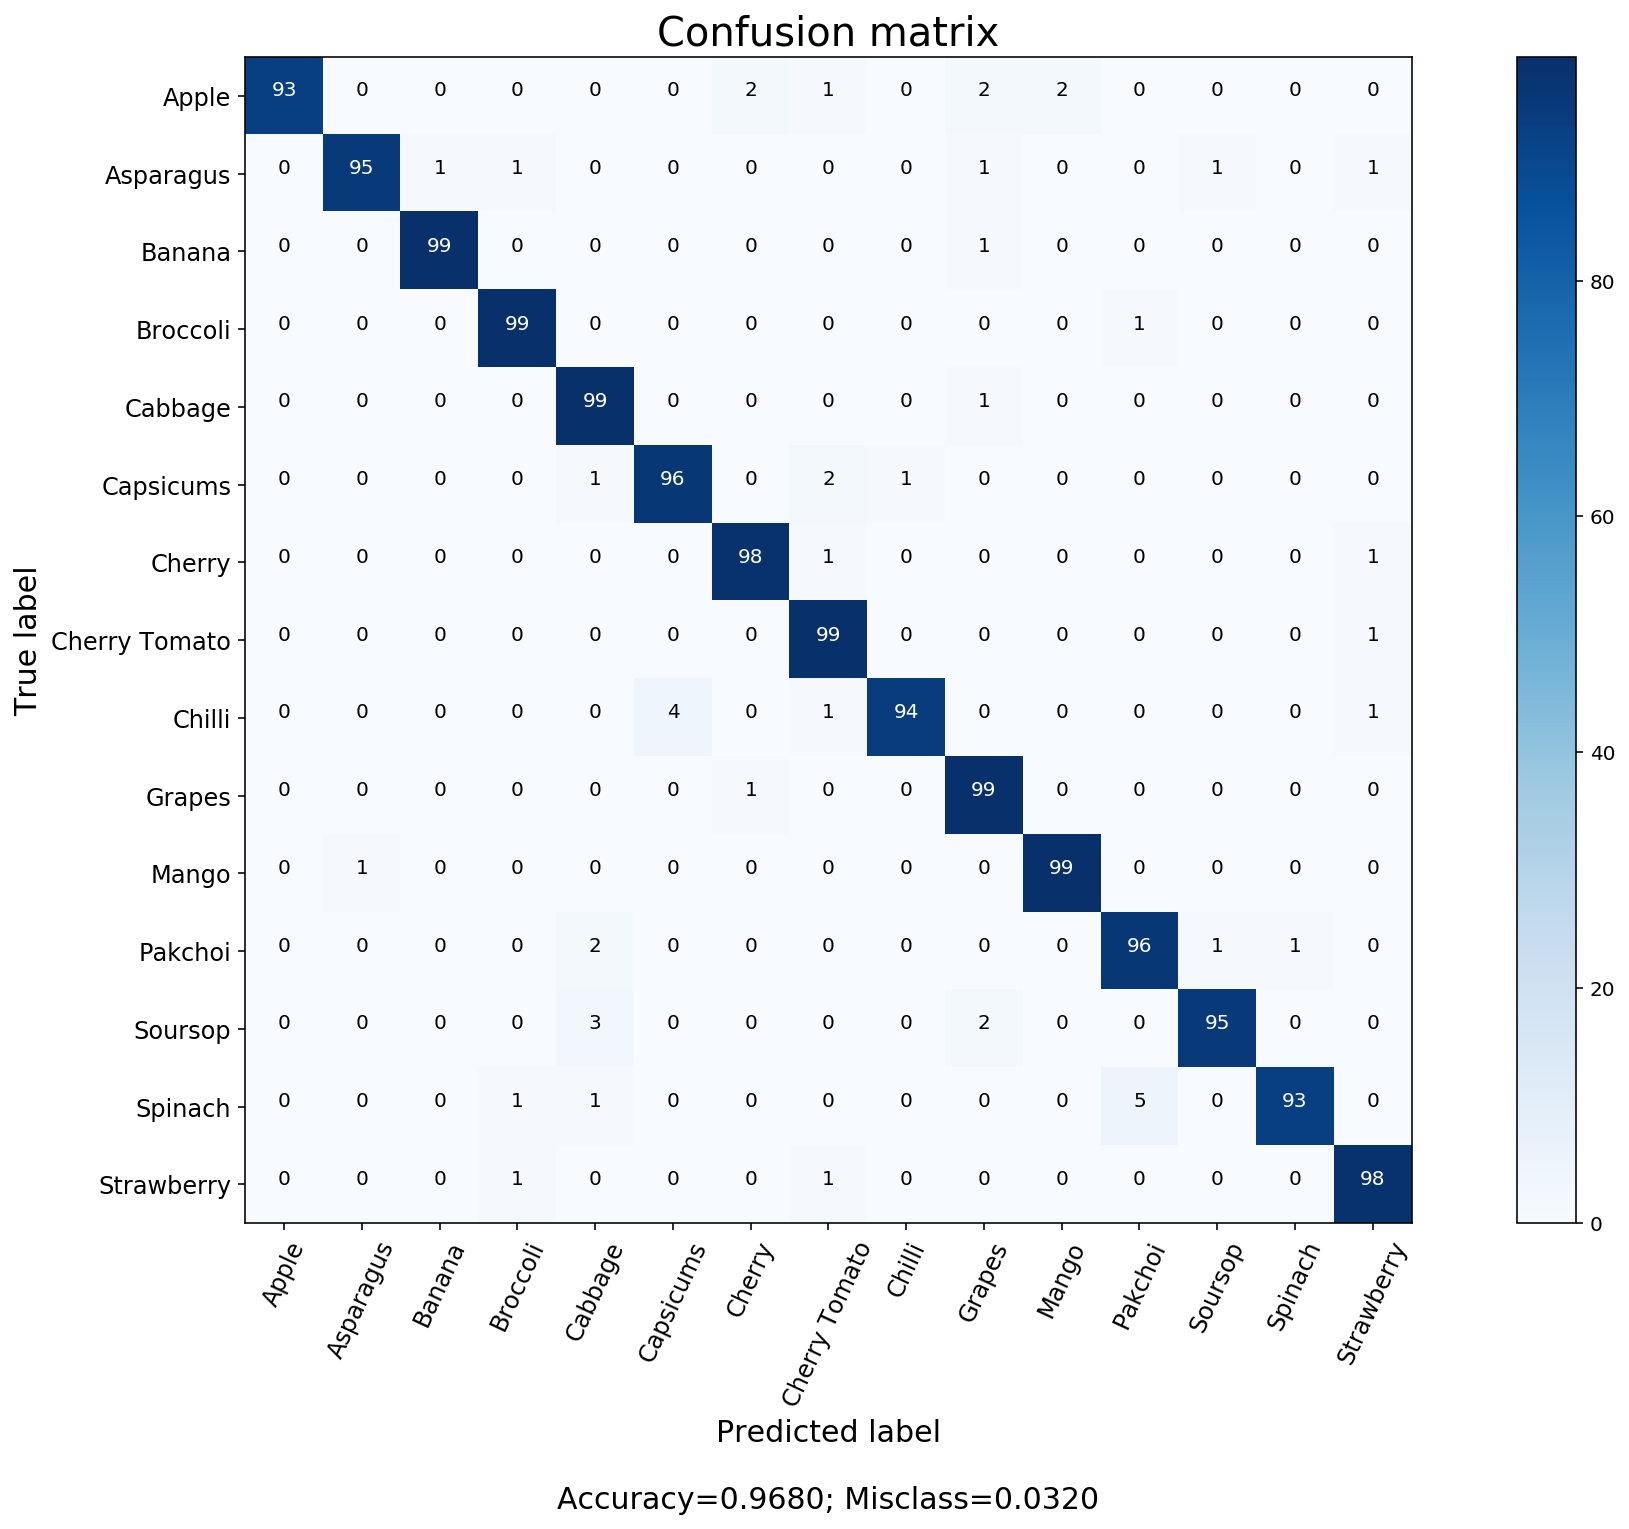

In [10]:
# Plotting of confusion matrix

plot_confusion_matrix(confusion_matrix(true_labels, predictions), target_names=target_names)

In [11]:
# Classification report
print(classification_report(true_labels, predictions, target_names=target_names))

               precision    recall  f1-score   support

        Apple       1.00      0.93      0.96       100
    Asparagus       0.99      0.95      0.97       100
       Banana       0.99      0.99      0.99       100
     Broccoli       0.97      0.99      0.98       100
      Cabbage       0.93      0.99      0.96       100
    Capsicums       0.96      0.96      0.96       100
       Cherry       0.97      0.98      0.98       100
Cherry Tomato       0.94      0.99      0.97       100
       Chilli       0.99      0.94      0.96       100
       Grapes       0.93      0.99      0.96       100
        Mango       0.98      0.99      0.99       100
      Pakchoi       0.94      0.96      0.95       100
      Soursop       0.98      0.95      0.96       100
      Spinach       0.99      0.93      0.96       100
   Strawberry       0.96      0.98      0.97       100

  avg / total       0.97      0.97      0.97      1500



### Top 3 Error Rate

I have taken a step further to evaluate the top 3 error rate. Simply put, if the correct label is predicted within the top 3 probabilities, it will be considered as correct. This further improves our accuracy to 99.9%.

In [11]:
# Function to extract the top 3 predictions for each image

def top_3_class_predictor(test_data, model):
    predictions = []
    for i in range(len(test_data)):
        result_proba = model.predict(test_data[i])
        top_3 = heapq.nlargest(3, range(len(result_proba[0])), result_proba[0].take)
        predictions.append(top_3)
    
    return predictions

In [12]:
top3_predictions = top_3_class_predictor(test_data, loaded_model)

In [13]:
# Image is considered correctly classified if it's in the top 3 predictions
true_in_top3pred = []

for i in range(len(test_data)):
    if true_labels[i] in top3_predictions[i]:
        true_in_top3pred.append(true_labels[i])
    else:
        true_in_top3pred.append(top3_predictions[i][0])

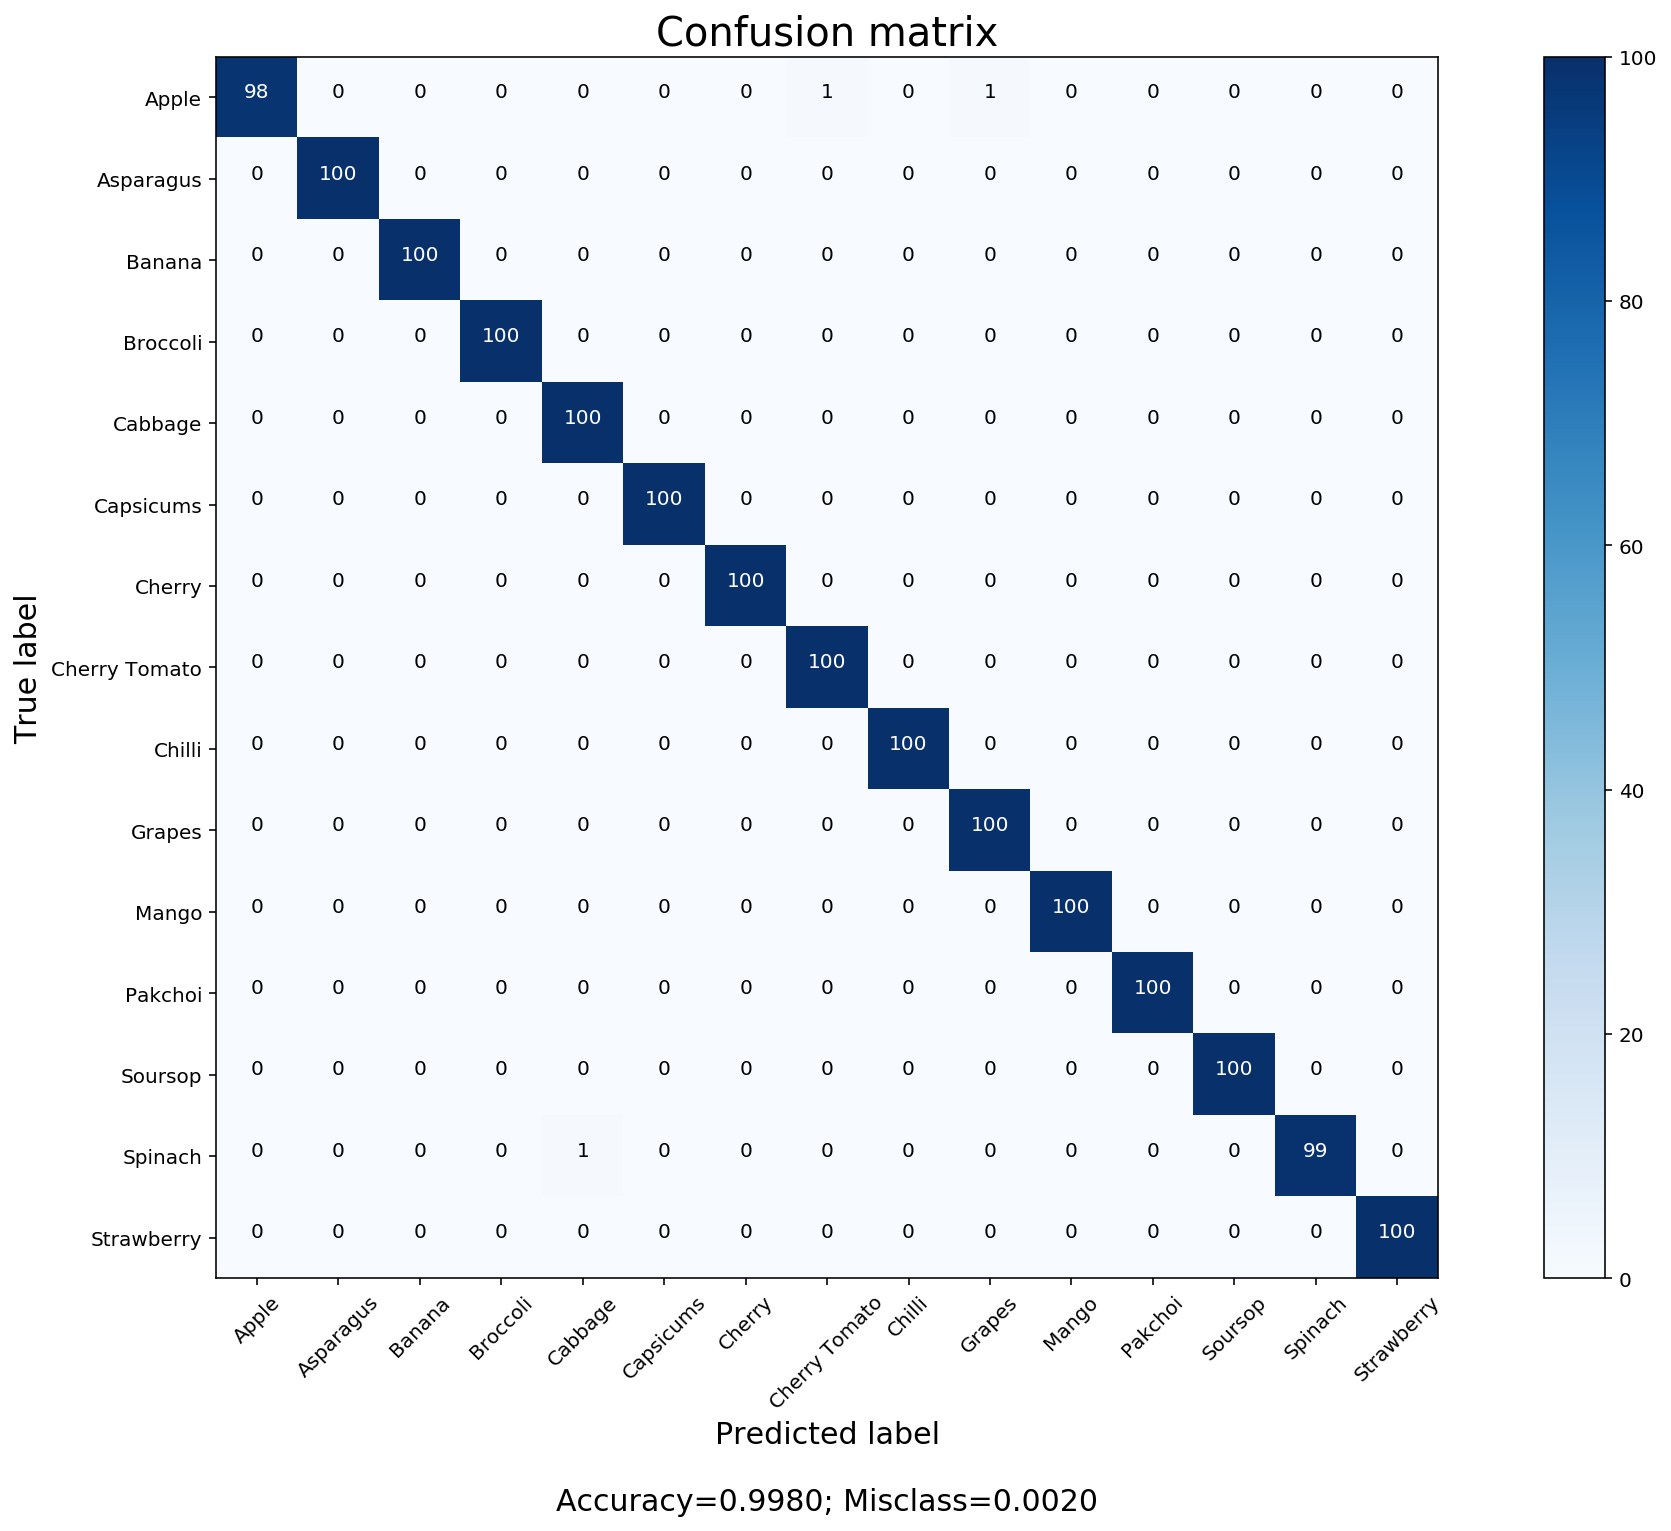

In [14]:
plot_confusion_matrix(confusion_matrix(true_labels, true_in_top3pred), target_names=target_names)

In [15]:
print(classification_report(true_labels, true_in_top3pred, target_names=target_names))

               precision    recall  f1-score   support

        Apple       1.00      0.99      0.99       100
    Asparagus       1.00      1.00      1.00       100
       Banana       1.00      1.00      1.00       100
     Broccoli       1.00      1.00      1.00       100
      Cabbage       1.00      1.00      1.00       100
    Capsicums       0.99      0.99      0.99       100
       Cherry       1.00      0.99      0.99       100
Cherry Tomato       1.00      1.00      1.00       100
       Chilli       1.00      1.00      1.00       100
       Grapes       1.00      1.00      1.00       100
        Mango       1.00      1.00      1.00       100
      Pakchoi       0.99      1.00      1.00       100
      Soursop       0.99      1.00      1.00       100
      Spinach       1.00      0.99      0.99       100
   Strawberry       0.99      1.00      1.00       100

  avg / total       1.00      1.00      1.00      1500



In [ ]:
top3_predictions.index([14,8,6])

### Section 4: Identify images that are wrongly classified

In [43]:
# Preparing list of indexes for wrongly classified images
errors = []

for i in range(len(true_labels)):
    if true_labels[i] != predictions[i]:
        errors.append(i)

In [46]:
errors

[23,
 50,
 59,
 69,
 73,
 87,
 88,
 100,
 115,
 124,
 158,
 185,
 226,
 389,
 403,
 510,
 526,
 539,
 574,
 671,
 698,
 752,
 837,
 844,
 856,
 883,
 885,
 891,
 973,
 1006,
 1104,
 1140,
 1161,
 1185,
 1230,
 1255,
 1257,
 1288,
 1294,
 1332,
 1341,
 1347,
 1355,
 1364,
 1387,
 1399,
 1440,
 1496]

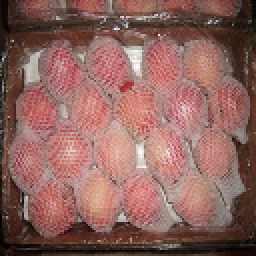

In [57]:
# Random checking of error prediction

img = test_data[50][0]*255
pic = Image.fromarray(img.astype('uint8'), 'RGB')
pic.resize(size=(256,256))

In [62]:
# Function to return name of wrong prediction

def error_handle(i):
    hhh = test_data[i][0]*255
    kkk = Image.fromarray(hhh.astype('uint8'), 'RGB') 
    print(target_names[predictions[i]])
    return kkk.resize(size=(256,256))

Cherry Tomato


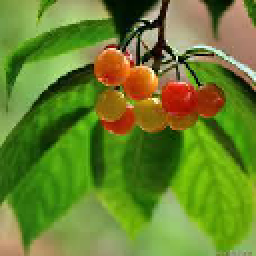

In [74]:
error_handle(errors[19])